# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
data=np.genfromtxt('RegData.csv',delimiter=',')
data.shape

(13, 2)

In [3]:
x=data[:,0]
x

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [4]:
x.shape

(13,)

In [5]:
y=data[:,1]
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [6]:
y.shape

(13,)

# Explore data

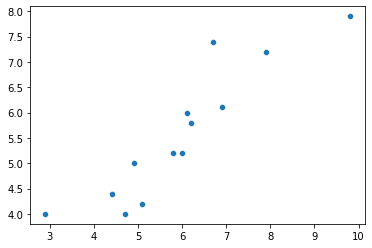

In [7]:
import seaborn as sns
sns.scatterplot(x=x,y=y)
plt.show()

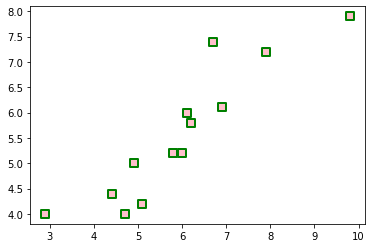

In [8]:
plt.scatter(x, y, c ="pink", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
plt.show()

In [9]:
x_df=pd.DataFrame(x)
x_df

,0
0,2.9
1,6.7
2,4.9
3,7.9
4,9.8
5,6.9
6,6.1
7,6.2
8,6.0
9,5.1


In [10]:
y_df=pd.DataFrame(y)
y_df

,0
0,4.0
1,7.4
2,5.0
3,7.2
4,7.9
5,6.1
6,6.0
7,5.8
8,5.2
9,4.2


In [11]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
dtypes: float64(1)
memory usage: 232.0 bytes


In [12]:
x_df.describe()

,0
count,13.000000
mean,5.953846
std,1.714942
min,2.900000
25%,4.900000
50%,6.000000
75%,6.700000
max,9.800000


In [13]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
dtypes: float64(1)
memory usage: 232.0 bytes


In [14]:
y_df.describe()

,0
count,13.000000
mean,5.569231
std,1.314271
min,4.000000
25%,4.400000
50%,5.200000
75%,6.100000
max,7.900000


# Gradient Descent

In [17]:
def GDnonvect(x_points,y_points,epoch,alpha):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    m=x_points.shape[0]
    for i in range(epoch):
        y_pred=theta0+theta1*x_points
        lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
        loss_list.append(lossfun)
        epochs.append(i)
        theta0=theta0-alpha*(1/m)*np.sum(y_pred-y_points)
        theta1=theta1-alpha*(1/m)*np.sum((y_pred-y_points)*x_points)
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        if i>0:
            if (np.abs(loss_list[-1]-loss_list[-2])<0.001):
                break
    y_pred=y_pred=theta0+theta1*x_points
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta0)
    print("theta 1",theta1)
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list,y_pred

In [19]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list,y_pred=GDnonvect(x,y,20,0.01)

accuracy= 74.77103397023286 %
theta 0 0.1505366994471901
theta 1 0.892751517504432


In [21]:
def plot(x_points,y_points,epochs,theta0_list,theta1_list,loss_list):
    fig, ax = plt.subplots(2,2)
    y_pred=theta0_list[-1]+theta1_list[-1]*x_points
    ax[0,0].plot(x_points,y_points,'*')
    ax[0,0].plot(x_points, y_pred)
    ax[0,1].plot(epochs,loss_list)
    ax[1,0].plot(theta0_list,loss_list)
    ax[1,1].plot(theta1_list,loss_list)

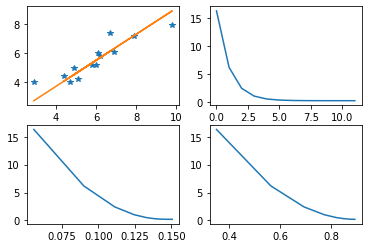

In [22]:
plot(x,y,epochs,theta0_list,theta1_list,loss_list)

In [26]:
def GD(x_points,y_points,epoch,alpha):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    data=np.stack((mat_ones,x_points),axis=1)
    for i in range(epoch): 
          y_pred=np.dot(data,theta)
          z=y_pred-y_points
          grad=(1/m)*np.dot(data.T,z)
        # y_pred=np.dot(data,theta)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          theta=theta-alpha*grad
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
          if i>0:
            if (np.linalg.norm(grad)<0.001) or (np.abs(loss_list[-1]-loss_list[-2])<0.001):
                break
    theta0=theta[0]
    theta1=theta[1]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list,y_pred

In [27]:
theta0_a,theta1_a,epochs_a,loss_list_a,theta0_list_a,theta1_list_a,y_pred_a=GD(x,y,20,0.03)

accuracy= 74.78322921551617 %
theta 0 0.15360427234983573
theta 1 0.894807589602914


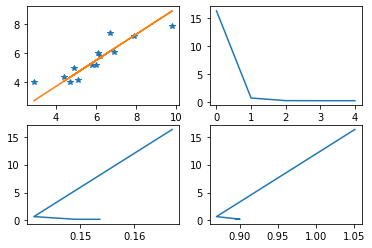

In [28]:
plot(x,y,epochs_a,theta0_list_a,theta1_list_a,loss_list_a)

In [29]:
x_points1=x.reshape(-1,1)
y_points1=y.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_points1, y_points1)
print("theta1:", model.coef_)
print("\ntheta0:", model.intercept_)


theta1: [[0.69452919]]

theta0: [1.43411077]


In [30]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list,y_pred=GD(x,y,1000,0.001) #at 0.01

accuracy= 73.3317676295001 %
theta 0 0.1448259246186392
theta 1 0.8726054645261807


In [ ]:
def plot(x_points,y_points,epochs,theta0_list,theta1_list,loss_list):
    fig, ax = plt.subplots(2,2)
    y_pred=theta0_list[-1]+theta1_list[-1]*x_points
    ax[0,0].plot(x_points,y_points,'*')
    ax[0,0].plot(x_points, y_pred)
    ax[0,1].plot(epochs,loss_list)
    ax[1,0].plot(theta0_list,loss_list)
    ax[1,1].plot(theta1_list,loss_list)

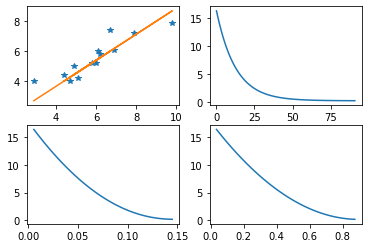

In [31]:
plot(x,y,epochs,theta0_list,theta1_list,loss_list)

In [32]:
theta0_a,theta1_a,epochs_a,loss_lista,theta0_list_a,theta1_list_a,y_pred_a=GD(x,y,20,0.02)

accuracy= 74.76385054579725 %
theta 0 0.1508905597228018
theta 1 0.8949912009445132


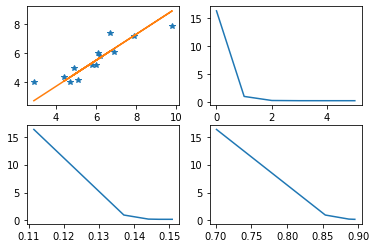

In [33]:
plot(x,y,epochs_a,theta0_list_a,theta1_list_a,loss_lista)

In [36]:
theta0_b,theta1_b,epochs_b,loss_listb,theta0_list_b,theta1_list_b,y_pred_b=GD(x,y,20,0.03)

accuracy= 74.78322921551617 %
theta 0 0.15360427234983573
theta 1 0.894807589602914


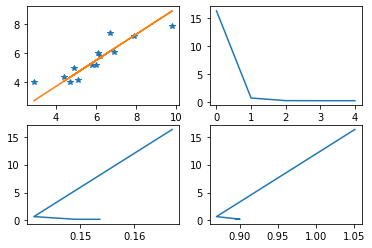

In [37]:
plot(x,y,epochs_b,theta0_list_b,theta1_list_b,loss_listb)

Text(0.5, 1.0, 'var')

<Figure size 1440x576 with 0 Axes>

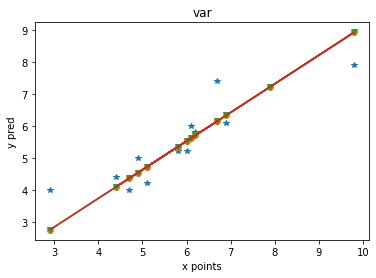

In [38]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
y_pred=theta0+theta1*x
y_preda=theta0_a+theta1_a*x
y_predb=theta0_b+theta1_b*x
ax.plot(x,y,'*')
ax.plot(x, y_preda,marker="o")
ax.plot(x, y_preda,marker="v")
ax.plot(x, y_predb)
ax.set_xlabel("x points")
ax.set_ylabel("y pred")
ax.set_title("var")

In [39]:
def readcsv(filename):
    data=np.genfromtxt(filename,delimiter=',')
    x_points=data[:,:-1]
    y_points=data[:,-1]
    return x_points,y_points

In [40]:
x,y=readcsv("MultipleLR.csv")

# Multivariate Gradient Descent

In [41]:
def Multivariate_GD(x_points,y_points,epoch,alpha):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta2_list=[]
    theta3_list=[]
    theta=np.array([0,0,0,0])
    mat_ones=np.ones(y_points.shape) #(25,)
    data=np.column_stack((mat_ones,x_points))
  #  print("datashape",data.shape)
    m=x_points.shape[0]
   # print("data shape",m)
    for i in range(epoch): 
          y_pred=np.dot(data,theta)
    #      print("ypred",y_pred.shape)
          z=y_pred-y_points
          grad=(1/m)*np.dot(data.T,z)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          theta=theta-alpha*grad
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
          theta2_list.append(theta[2])
          theta3_list.append(theta[3])
          if i>0:
             if (np.linalg.norm(grad)<0.001)or (np.abs(loss_list[-1]-loss_list[-2])<0.001):
               break
         # break
    theta0=theta[0]
    theta1=theta[1]
    theta2=theta[2]
    theta3=theta[3]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta,theta0,theta1,theta2,theta3,epochs,loss_list,theta0_list,theta1_list,theta2_list,theta3_list,y_pred

In [42]:
theta,theta0,theta1,theta2,theta3,epochs,loss_list,theta0_list,theta1_list,theta2_list,theta3_list,y_pred=Multivariate_GD(x,y,900,0.0001)

accuracy= 98.79310084690472 %
theta 0 0.005490364936994219
theta 1 0.49556707890825


In [43]:
theta_a,theta0_a,theta1_a,theta2_a,theta3_a,epochs_a,loss_lista,theta0_lista,theta1_lista,theta2_lista,theta3_lista,y_preda=Multivariate_GD(x,y,500,0.0001)

accuracy= 98.73842121596867 %
theta 0 0.006220263976725681
theta 1 0.5190106779347964


<Figure size 1440x576 with 0 Axes>

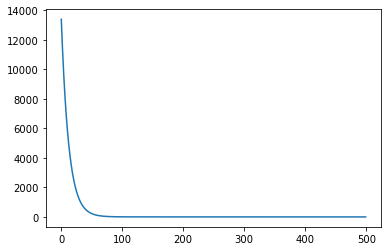

In [44]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_a,loss_lista)


<Figure size 1440x576 with 0 Axes>

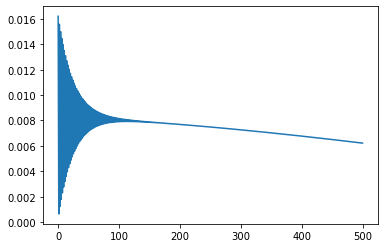

In [45]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_a,theta0_lista)

<Figure size 1440x576 with 0 Axes>

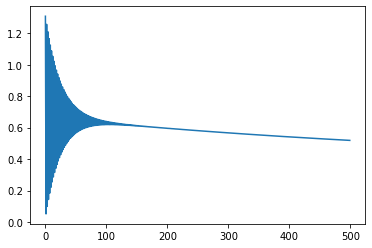

In [46]:
#theta1_lista
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_a,theta1_lista)

<Figure size 1440x576 with 0 Axes>

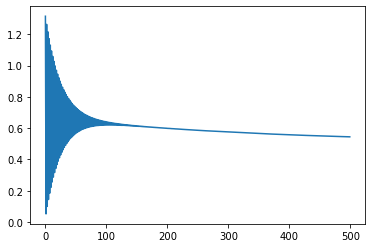

In [47]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_a,theta2_lista)

<Figure size 1440x576 with 0 Axes>

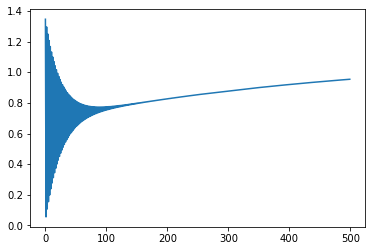

In [48]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_a,theta3_lista)

In [49]:
theta_b,theta0_b,theta1_b,theta2_b,theta3_b,epochs_b,loss_listb,theta0_listb,theta1_listb,theta2_listb,theta3_listb,y_predb=Multivariate_GD(x,y,20,0.00001)

accuracy= 96.67519053851329 %
theta 0 0.008160363559729112
theta 1 0.6581097382309128


<Figure size 1440x576 with 0 Axes>

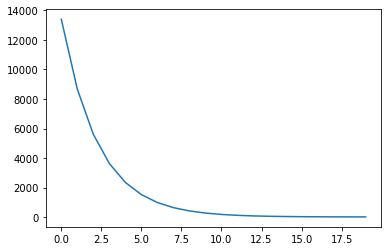

In [50]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_b,loss_listb)


<Figure size 1440x576 with 0 Axes>

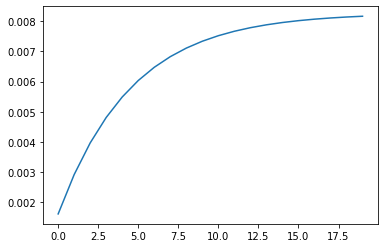

In [51]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_b,theta0_listb)

<Figure size 1440x576 with 0 Axes>

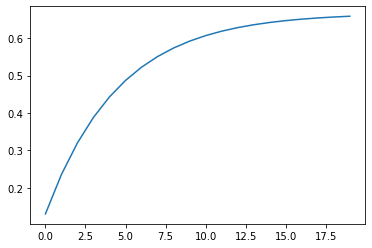

In [52]:
plt_1 = plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()
ax.plot(epochs_b,theta1_listb)